11493376/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________

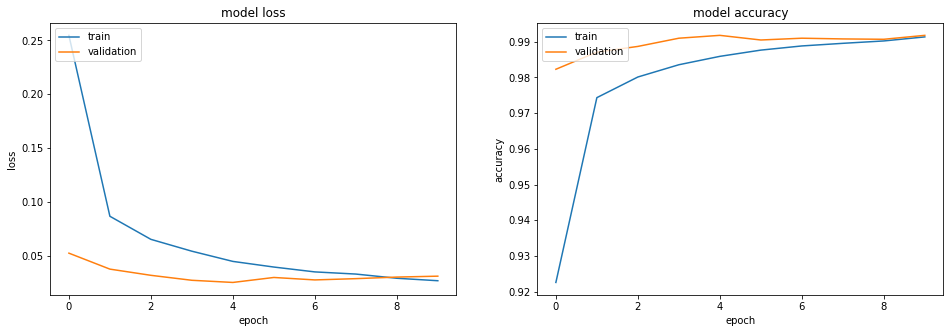

[3.1145073e-13, 1.5299895e-14, 3.4500292e-10, 3.6878198e-09, 3.451382e-08, 2.5069907e-10, 3.4132278e-16, 4.822659e-12, 2.139859e-06, 0.99999785]
Number is  9 (probability 99.9998)


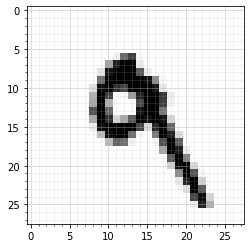

In [1]:
# 만들어진 모델에 대해 loss, accuracy 를 그래프로 표현
def display_graph():
    plt.figure(figsize=(16,5))

    # 만들어진 모델에 대해 train dataset과 validation dataset의 loss 를 그래프로 표현해 봅니다.
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')

    # 만들어진 모델에 대해 train dataset과 validation dataset의 accuracy 를 그래프로 표현해 봅니다.
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    
    plt.show()

# 특정한 숫자(digit)의 이미지를 Display 해주는 함수 정의
def show_digit_image(image):
    # Draw digit image
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    # Major ticks every 20, minor ticks every 5
    major_ticks = np.arange(0, 29, 5)
    minor_ticks = np.arange(0, 29, 1)
    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    ax.set_yticks(major_ticks)
    ax.set_yticks(minor_ticks, minor=True)
    # And a corresponding grid
    ax.grid(which='both')
    # Or if you want different settings for the grids:
    ax.grid(which='minor', alpha=0.2)
    ax.grid(which='major', alpha=0.5)
    ax.imshow(image, cmap=plt.cm.binary)

    plt.show()

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

batch_size = 128   # batch size 정의
num_classes = 10   # 분류하고자 하는 숫자가 총 10개(0 ~ 9)
epochs = 100       # training 횟수(epoch)

# input image dimensions
img_rows, img_cols = 28, 28

# MNIST dataset을 불러와서 train dataset과 test dataset에 넣어 줍니다.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 모델 구성하기
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(img_rows, img_cols, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# 모델 학습과정 설정하기
model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

# 모델 구성 확인하기
model.summary()

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)  # Reshape
x_train = x_train.astype('float32') / 255  # Feature Scaling(0 ~ 1 사이의 값으로 Data Preprocessing)

x_test_original = x_test  # test data(이미지) 복사
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)  # Reshape
x_test = x_test.astype('float32') / 255   # Feature Scaling(0 ~ 1 사이의 값으로 Data Preprocessing)

# label를 One Hot 구조로 변경
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

# 모델이 가장 best일때 모델을 저장하도록 설정
modelCheckpoint = ModelCheckpoint('best_digits_model.hdf5', save_best_only=True)

# val_acc 를 모니터링 하다가 조기에 학습을 종료하도록 설정
monitor_val_acc = EarlyStopping(monitor='val_accuracy', patience=5)

# 모델 학습시키기
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test),
                    callbacks=[monitor_val_acc, modelCheckpoint])   # callbacks에 EarlyStopping, ModelCheckpoint 설정

# 모델 평가하기
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# 그래프 출력
display_graph()

# 예측하기
selected_image = 7
result = model.predict(np.array([x_test[selected_image]]))  # result 에는 One hot encoding 형식으로 결과가 들어있음
result_number = np.argmax(result)   # argmax 함수를 사용해 One hot encoding 형식의 결과값 중 가장 큰 값의 index 를 반환

# 예측결과 출력
performance = [val for val in result[0]]
print(performance)
result_probability = performance[result_number]
print("Number is %2i (probability %7.4f)" % (result_number, result_probability*100))
show_digit_image(x_test_original[selected_image])

[7.974533e-09, 4.1508065e-13, 3.172951e-17, 5.1831365e-19, 5.491316e-13, 3.919662e-14, 1.0, 2.762198e-20, 2.3092937e-13, 2.5995266e-16]
Number is  6 (probability 100.0000)


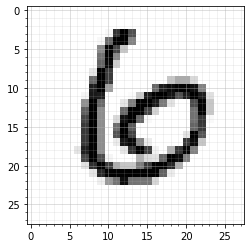

In [2]:
# 예측하기
selected_image = 11
result = model.predict(np.array([x_test[selected_image]]))  # result 에는 One hot encoding 형식으로 결과가 들어있음
result_number = np.argmax(result)   # argmax 함수를 사용해 One hot encoding 형식의 결과값 중 가장 큰 값의 index 를 반환

# 예측결과 출력
performance = [val for val in result[0]]
print(performance)
result_probability = performance[result_number]
print("Number is %2i (probability %7.4f)" % (result_number, result_probability*100))
show_digit_image(x_test_original[selected_image])